# Predicting Gross Income

## Loading the dataset

In [166]:
import os

import pandas as pd
import sklearn as skl

# import holcrawl.shared

In [40]:
# dataset_dir = holcrawl.shared._get_dataset_dir_path()

In [41]:
# dataset_path = os.path.join(dataset_dir, 'movies_dataset.csv')

In [245]:
df = pd.read_csv('movies_dataset.csv')

In [246]:
df.year.value_counts()

2009.0    163
2011.0    152
2012.0    148
2014.0    129
2013.0    122
2010.0    105
2015.0     67
2008.0     14
Name: year, dtype: int64

In [247]:
# list(df.columns)

## Feature Generation

In [169]:
df['name_length'] = df['name'].map(lambda name: len(name))

In [170]:
len(df)

900

In [171]:
df.isnull().sum()

avg_screens                                 0
budget                                    149
budget_currency                           149
closing_date                                0
critic_review_count                         0
duration                                    0
gross_income                                0
imdb_user_reviews                           0
max_screens                                 0
mc_avg_user_score                           0
mc_metascore                                0
mc_mixed_rating_frequency                   0
mc_movie_name                               0
mc_negative_rating_frequency                0
mc_positive_rating_frequency                0
mc_pro_critic_reviews                       0
mc_user_reviews                             0
metascore                                   3
name                                        0
num_weekends                                0
opening_weekend_date                        0
opening_weekend_income            

In [172]:
len(df[df['avg_mc_critic_by_opening'].notnull()])

634

In [174]:
BASE_FEAT_TO_KEEP = [
    'duration', 'budget', 'opening_month', 'opening_day', 'opening_day_of_year', 'year',
    'avg_mc_critic_by_opening', 'num_mc_critic_by_opening', 'name_length', 
    'num_imdb_user_by_opening', 'avg_imdb_user_by_opening', 'opening_weekend_screens'# 'avg_mc_user_by_opening'
]

In [175]:
FEAT_TO_KEEP = BASE_FEAT_TO_KEEP + [col for col in df.columns if 'genres' in col]

In [176]:
features = df.drop([col for col in df.columns if col not in BASE_FEAT_TO_KEEP], axis=1)

In [177]:
dataset = df.drop([col for col in df.columns if col not in FEAT_TO_KEEP], axis=1)

In [180]:
dataset = dataset.dropna(axis=0)

In [181]:
len(dataset)

518

In [186]:
dataset.columns

Index(['budget', 'duration', 'opening_weekend_screens', 'year',
       'genres.action', 'genres.adventure', 'genres.animation',
       'genres.biography', 'genres.comedy', 'genres.crime',
       'genres.documentary', 'genres.drama', 'genres.family', 'genres.fantasy',
       'genres.history', 'genres.horror', 'genres.music', 'genres.musical',
       'genres.mystery', 'genres.news', 'genres.romance', 'genres.sci-fi',
       'genres.sport', 'genres.thriller', 'genres.war', 'genres.western',
       'num_mc_critic_by_opening', 'avg_mc_critic_by_opening',
       'num_imdb_user_by_opening', 'avg_imdb_user_by_opening', 'opening_month',
       'opening_day', 'opening_day_of_year', 'name_length'],
      dtype='object')

In [187]:
pd.options.display.max_columns = 999
dataset.iloc[0:3]

,budget,duration,opening_weekend_screens,year,genres.action,genres.adventure,genres.animation,genres.biography,genres.comedy,genres.crime,genres.documentary,genres.drama,genres.family,genres.fantasy,genres.history,genres.horror,genres.music,genres.musical,genres.mystery,genres.news,genres.romance,genres.sci-fi,genres.sport,genres.thriller,genres.war,genres.western,num_mc_critic_by_opening,avg_mc_critic_by_opening,num_imdb_user_by_opening,avg_imdb_user_by_opening,opening_month,opening_day,opening_day_of_year,name_length
2,4000000.0,93.0,45.0,2014.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,10,49.700000,15,7.000000,4,18,108,7
5,42000000.0,110.0,3121.0,2012.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,72.179487,23,7.000000,3,16,76,14
6,50000000.0,112.0,3306.0,2014.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,72.844444,31,8.290323,6,13,164,14


## Predicting Gross Income

In [276]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [277]:
X = dataset
# Y = df['ROI'].ix[dataset.index]
Y = df['gross_income'].ix[dataset.index]

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

### Feature selection with Mutual Information Regression

In [279]:
FEATURES_TO_SELECT = 10

In [280]:
from sklearn.feature_selection import f_regression, mutual_info_regression
mi = mutual_info_regression(X_train, y_train)

In [281]:
mi_df = pd.DataFrame([mi]).T
mi_df.index = X_train.columns
mi_df.columns = ['MI']

In [282]:
mi_df = mi_df.sort('MI', ascending=False)
mi_df

/Users/shaypalachy/miniconda3/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,MI
opening_weekend_screens,5.257127e-01
budget,3.586542e-01
num_mc_critic_by_opening,2.638703e-01
num_imdb_user_by_opening,2.006672e-01
avg_mc_critic_by_opening,1.538417e-01
genres.adventure,9.011780e-02
opening_month,5.058676e-02
duration,4.018463e-02
opening_day_of_year,4.018256e-02
name_length,3.968138e-02


In [283]:
support = mi_df.index[0:FEATURES_TO_SELECT]

### Linear Regression

In [284]:
selected_X_train = X_train.drop([col for col in X_train if col not in support], axis=1)

In [285]:
selected_X_test = X_test.drop([col for col in X_test if col not in support], axis=1)

In [286]:
regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)
regr = regr.fit(selected_X_train, y_train)

In [287]:
coef_df = pd.DataFrame({'coef': regr.coef_}, index=selected_X_train.columns)
coef_df.sort('coef', ascending=False)

/Users/shaypalachy/miniconda3/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,coef
genres.adventure,9.753665e+06
opening_month,6.106549e+06
avg_mc_critic_by_opening,1.409603e+06
name_length,5.972524e+05
num_imdb_user_by_opening,4.134863e+05
num_mc_critic_by_opening,2.234796e+05
opening_weekend_screens,1.645777e+04
budget,5.119382e-01
duration,-5.560414e+04
opening_day_of_year,-2.007545e+05


In [288]:
y_predict = regr.predict(selected_X_test)

In [289]:
regr.score(selected_X_test, y_test) 

0.66185796843055644

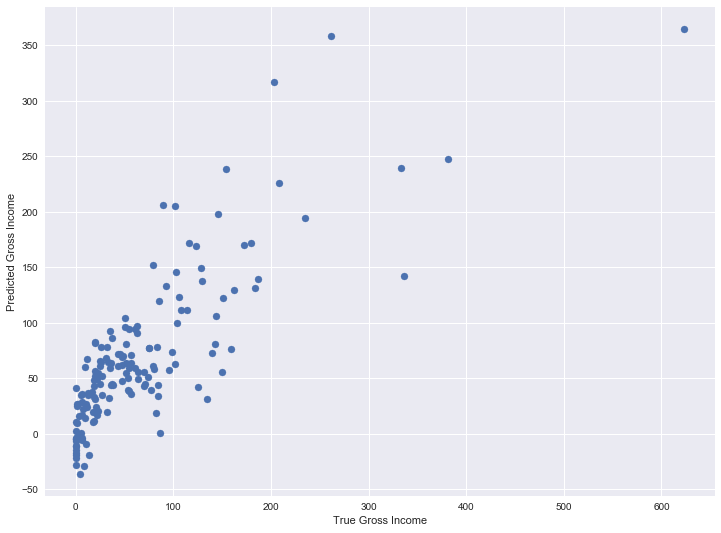

In [290]:
plt.figure(figsize=(12,9))
plt.scatter(y_test / 1000000, y_predict / 1000000)
plt.xlabel('True Gross Income')
plt.ylabel('Predicted Gross Income');

## With opening weekend income

In [256]:
X_train_weekend_inc = X_train
X_train_weekend_inc['opening_weekend_income'] = df.ix[X_train.index]['opening_weekend_income']
X_test_weekend_inc = X_test
X_test_weekend_inc['opening_weekend_income'] = df.ix[X_test.index]['opening_weekend_income']

/Users/shaypalachy/miniconda3/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/shaypalachy/miniconda3/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [257]:
mi = mutual_info_regression(X_train_weekend_inc, y_train)

In [258]:
mi_df = pd.DataFrame([mi]).T
mi_df.index = X_train_weekend_inc.columns
mi_df.columns = ['MI']

In [259]:
mi_df = mi_df.sort('MI', ascending=False)
mi_df

/Users/shaypalachy/miniconda3/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,MI
opening_weekend_income,1.229179e+00
opening_weekend_screens,6.176942e-01
budget,4.129944e-01
num_mc_critic_by_opening,2.830909e-01
num_imdb_user_by_opening,1.497448e-01
genres.adventure,1.076145e-01
opening_day_of_year,9.753823e-02
avg_mc_critic_by_opening,7.608544e-02
duration,6.042927e-02
genres.animation,5.459138e-02


In [260]:
support = mi_df.index[0:FEATURES_TO_SELECT]

In [261]:
selected_X_train_weekend_inc = X_train_weekend_inc
selected_X_test_weekend_inc = X_test_weekend_inc
selected_X_train_weekend_inc = X_train_weekend_inc.drop([col for col in X_train_weekend_inc if col not in support], axis=1)
selected_X_test_weekend_inc = X_test_weekend_inc.drop([col for col in X_test_weekend_inc if col not in support], axis=1)

In [262]:
regr2 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
regr2 = regr2.fit(selected_X_train_weekend_inc, y_train)

In [263]:
coef_df2 = pd.DataFrame({'coef': regr2.coef_}, index=selected_X_train_weekend_inc.columns)
coef_df2.sort('coef', ascending=False)

/Users/shaypalachy/miniconda3/envs/ds/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,coef
genres.animation,3.641685e+07
avg_mc_critic_by_opening,6.797033e+05
duration,2.911722e+05
opening_day_of_year,3.573639e+04
opening_weekend_screens,2.587271e+03
opening_weekend_income,2.356574e+00
budget,1.995159e-01
num_imdb_user_by_opening,-3.475150e+04
num_mc_critic_by_opening,-3.527992e+05
genres.adventure,-2.864501e+06


In [266]:
y_predict2 = regr2.predict(selected_X_test_weekend_inc)
regr2.score(selected_X_test_weekend_inc, y_test) 

0.81705961271413918

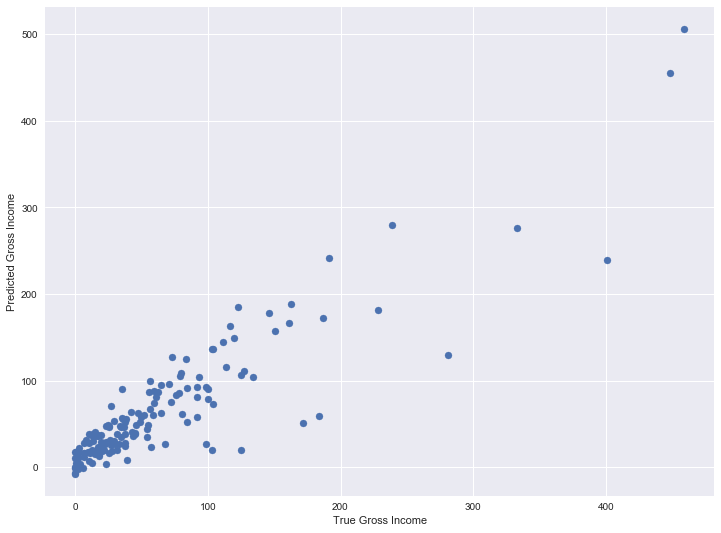

In [267]:
plt.figure(figsize=(12,9))
plt.scatter(y_test / 1000000, y_predict2 / 1000000)
plt.xlabel('True Gross Income')
plt.ylabel('Predicted Gross Income');
# plt.title('Predicted vs True Gross Income');